<a href="https://colab.research.google.com/github/ParkJeongUng/Ung.github.io/blob/master/_notebooks/K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80_KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K - 최근접 이웃 회귀 // KNeighborsRegressor

## 회귀
* 임의의 어떤 숫자를 예측
* 두 변수 사이의 상관관계를 분석하는 방법

In [ ]:
import numpy as np

# 농어의 특성 = 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
# 농어의 타겟 = 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

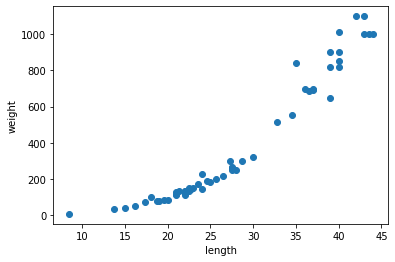

In [ ]:
# 이 데이터의 형태를 보기 위한 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 농어의 길이가 길어질수록 무게가 늘어난다.

In [ ]:
# train 세트와 test 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다. --> 수동으로 1차원 배열을 2차원 배열로 만들어줘야 한다 --> reshape()
# reshape 메서드는 크기에 -1 을 지정하면 남은 원소 개수로 모두 채우라는 의미
train_input = train_input.reshape(-1, 1) # == train_input.reshape(42, 1)
print(train_input.shape)

test_input = test_input.reshape(-1, 1)
print(test_input.shape)

(42, 1)
(14, 1)


In [ ]:
# KNeighborsRegressor 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))
# 스코어가 1이 안나왔다 --> 회귀에서는 정확한 숫자를 맞힌다는 것이 거의 불가능하다. --> 예측하는 값이 모두 임의의 수치이기 때문

0.9928094061010639


In [ ]:
# 어느정도 예측이 벗어났는지 확인하기 --> 타깃과 예측한 값 사이의 차이를 확인 --> mean_absolute_error --> 타깃과 예측의 절댓값 오차의 평균
from sklearn.metrics import mean_absolute_error

# 테스트 세트의 예측값을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 절댓값 오차의 평균을 구한다.
mae = mean_absolute_error(test_target, test_prediction)
mae

# 19그람 정도의 오차가 발생한다.

19.157142857142862

## 훈련 세트를 사용해 모델 평가하기 // 과소적합, 과대적합
* score(train) > score(test) --> 모델이 훈련세트에 과대적합 되었다. --> 실전에 투입하면 예측이 잘 안됨 --> 모델을 덜 복잡하게 만들어 해결한다. --> 이웃의 개수를 늘린다
* score(train) < score(test) --> 모델이 훈련세트에 과소적합 되었다. --> 모델이 너무 단순하다. --> 모델을 더 복잡하게 만들어 해결한다. --> 이웃의 개수를 줄인다. 

In [ ]:
# 훈련 세트로 점수 확인하기
print(knr.score(train_input, train_target))

# 테스트 세트로 점수 확인하기
print(knr.score(test_input, test_target))

# score(train) < score(test) --> 과소적합 --> 데이터가 작을경우 과소적합이 발생할 수 있다.

0.9698823289099255
0.9928094061010639


In [ ]:
# 과소적합을 해결하기 위해 모델을 복잡하게 만든다. --> n_neighbors의 개수를 줄인다.
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 이웃의 개수를 줄였더니 train 세트와 test 세트의 score가 비슷하게 나온다.

0.9804899950518966
0.974645996398761


## 연습

In [ ]:
# 농어의 특성 = 길이

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 농어의 타겟 = 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# train test split
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 2차원 배열로 변형
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 모델링
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 스코어
knr.score(test_input, test_target)

# 오차확인 mean absoulte error
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)

# 과소적합 --> 테스트세트 스코어가 트레인세트 스코어보다 높다
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 과소적합 해결 --> 모델을 복잡하게 만든다. --> 이웃수 줄이기
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))


0.9698823289099255
0.9928094061010639
0.9804899950518966
0.974645996398761


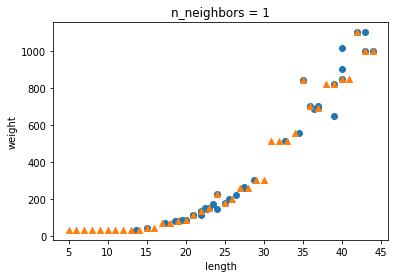

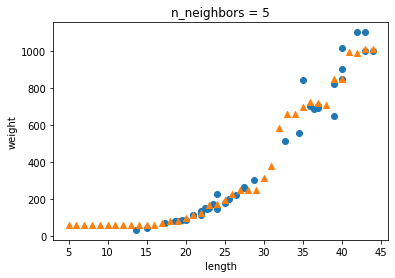

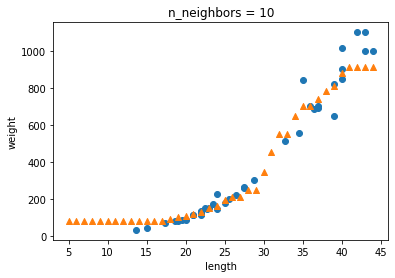

In [ ]:
# 모델의 복잡성 확인하기
# n_neighbors = [1, 5, 10]
# 농어의 길이를 5에서 45까지 바꿔가며 모델링 결과 확인하기

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  predict = knr.predict(x)

  
  plt.scatter(train_input, train_target)
  plt.scatter(x, predict, marker = '^')
  plt.title("n_neighbors = {}".format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()